In [62]:
import cv2
import numpy as np
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from imutils import perspective
from imutils import contours
from scipy.spatial import distance as dist

from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.measure import label
from skimage.color import label2rgb
from skimage import measure
from PIL import Image
from google.colab import files
import time

In [ ]:
# !rm -rf /content/data

In [15]:
# !mkdir data/

mkdir: cannot create directory ‘data/’: File exists


In [18]:
! git clone https://github.com/RobertSmithers/TeethSegmentation.git

Cloning into 'TeethSegmentation'...
remote: Enumerating objects: 623, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 623 (delta 2), reused 9 (delta 2), pack-reused 614
Receiving objects: 100% (623/623), 376.90 MiB | 36.28 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [19]:
import sys
sys.path.append("/content/TeethSegmentation")

In [20]:
%cd '/content/TeethSegmentation/'

/content/TeethSegmentation


# Test

In [44]:
import random

random_number=random.randint(1,117)
print('Random Number:', random_number)

Random Number: 41


Random Image = 41.png


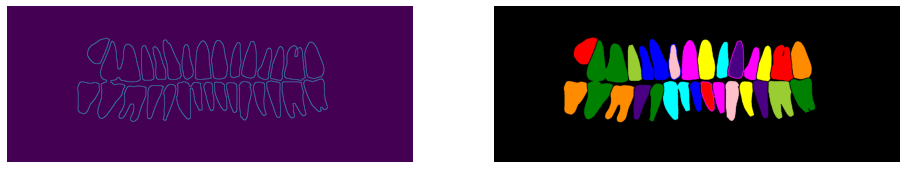

In [45]:
#img= '/content/88.png'
img = '/content/TeethSegmentation/data/masked_img/' + str(random_number) + '.png'
print('Random Image = ' + str(random_number) + '.png')

# Load in image, convert to gray scale, and Otsu's threshold
kernel = (np.ones((3,3), dtype=np.float32))

image = cv2.imread(img)
#image = mpimg.imread(img)

image=cv2.resize(image,(3130,1200))
image=cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

erosion = cv2.erode(thresh,kernel,iterations =5)
#gradient, aka the contours
gradient = cv2.morphologyEx(erosion, cv2.MORPH_GRADIENT, kernel)

# distance_map = ndi.distance_transform_edt(erosion)
# distance_map = ndi.maximum_filter(distance_map, size=15, mode='constant')
# local_max = peak_local_max(distance_map, indices=False, min_distance=40, labels=thresh)
# # markers = ndi.label(local_max)[0]
# # print(markers)
# # seg_watershed = watershed(-distance_map, markers, mask=thresh)

# distance = ndi.distance_transform_edt(thresh)
# # optima_window_size = 50
# coords = peak_local_max(distance,\
#                         footprint=np.ones((167, 133)),\
#                         labels=thresh)
# mask = np.zeros(distance.shape, dtype=bool)
# mask[tuple(coords.T)] = True
# markers, _ = ndi.label(mask)
# seg_watershed = watershed(-distance, markers, mask=thresh)

ret,markers=cv2.connectedComponents(erosion)
new=watershed(erosion,markers,mask=thresh)
RGB = label2rgb(new, bg_label=0)

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(2, 2, 1) 
plt.axis('off')
plt.imshow(gradient)

ax = fig.add_subplot(2, 2, 2) 
plt.imshow(RGB)
plt.axis('off')
plt.show()

# Post-process images

In [46]:
#connected components(CC)
def ConnectedComp(image):
  # Load in image, convert to gray scale, and Otsu's threshold
  kernel =(np.ones((3,3), dtype=np.float32))
  image = cv2.imread(img)
  image=cv2.resize(image,(3130,1200))
  image=cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

  erosion = cv2.erode(thresh,kernel,iterations =5)
  #gradient, aka the contours
  gradient = cv2.morphologyEx(erosion, cv2.MORPH_GRADIENT, kernel)

  ret,markers=cv2.connectedComponents(erosion)
  new=watershed(erosion,markers,mask=thresh)
  RGB = label2rgb(new, bg_label=0)
  return erosion,gradient,RGB

Random Image = 41.png


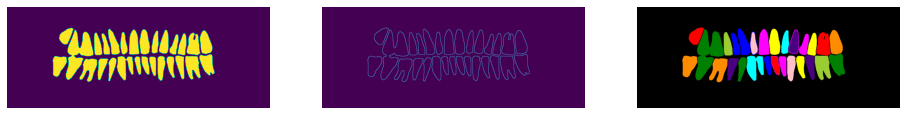

In [47]:
#upload a random image to test
img = '/content/TeethSegmentation/data/masked_img/' + str(random_number) + '.png'
print('Random Image = ' + str(random_number) + '.png')

erosion,gradient,RGB=ConnectedComp(img)

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1, 3, 1) 
plt.axis('off')
plt.imshow(erosion)

ax = fig.add_subplot(1,3, 2) 
plt.axis('off')
plt.imshow(gradient)

ax = fig.add_subplot(1,3, 3) 
plt.imshow(RGB)
plt.axis('off')
plt.show()

# Connected Component Segmentation for All Images

In [48]:
cc_images = []
for i in range (1, 117):
  img = '/content/TeethSegmentation/data/masked_img/' + str(i) + '.png'
  cc_img = ConnectedComp(img)
  cc_images.append(cc_img[2])

#print(len(cc_images))

116


# Save Connected Component Images

In [57]:
#print(type(cc_images[1]))

for i in range(len(cc_images)):
  im = Image.fromarray((cc_images[i] * 255).astype(np.uint8))
  x = i + 1
  im.save(str(x)+'.png')

# Download

In [ ]:
i = 1
while i < (len(cc_images)+1):
  files.download(str(i)+ '.png')
  i = i + 1
  time.sleep(60)

In [ ]:
#files.download(str(116)+ '.png')